In [1]:
%load_ext autoreload
%autoreload 2

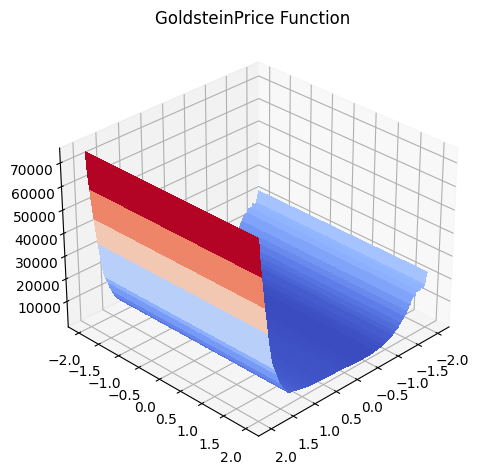

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from data.simulation_functions import *
n_data = 1000
func = GoldsteinPrice(n_data)
features = func.build_features(n_data).sort(axis=0).values
targets = func.calculate_targets(*features.permute(1,0))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = features[:,0].numpy()
Y = features[:,1].numpy()
X, Y = np.meshgrid(X, Y)
Z = targets.reshape(-1,1).numpy()

surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(30, 45)
ax.set_title(type(func).__name__ + " Function")
fig.tight_layout()
fig.savefig("imgs/" + type(func).__name__, dpi=300, bbox_inches="tight")

In [77]:
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from data.epidemiology import Epidemiology
from torch.distributions.uniform import Uniform
%reload_ext autoreload
%autoreload 2
beta_dist = Uniform(0.02, 0.09)
gamma_dist = Uniform(0.002, 0.01)
ds = Epidemiology(beta_dist, gamma_dist, 2, 3, 1, "val")
dataloader = DataLoader(ds, batch_size=32)

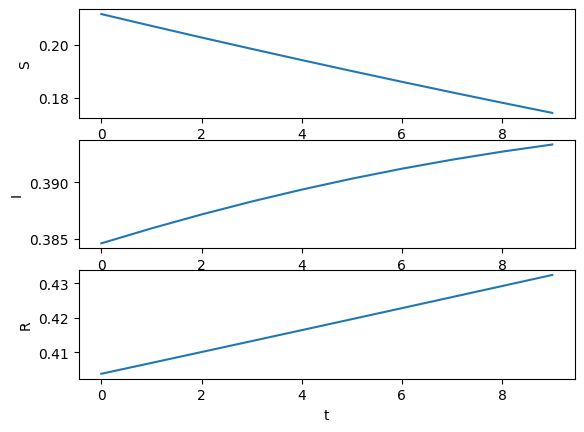

In [122]:
import matplotlib.pyplot as plt
import torch
from data.epidemiology import Epidemiology
from torch.distributions.uniform import Uniform
%reload_ext autoreload
%autoreload 2
beta_dist = Uniform(0.02, 0.09)
gamma_dist = Uniform(0.002, 0.01)
ds = Epidemiology(beta_dist, gamma_dist, 1, 10, 1, "train")
dataloader = DataLoader(ds, batch_size=32)
fig, ax = plt.subplots(3,1)
for X,y in dataloader:
    X = torch.concat((X[:,:1,:], y), dim=1)
    ax[0].plot(X[:,:,0].T)
    ax[1].plot(X[:,:,1].T)
    ax[2].plot(X[:,:,2].T)
ax[0].set_ylabel("S")
ax[1].set_ylabel("I")
ax[2].set_ylabel("R")
ax[2].set_xlabel("t");

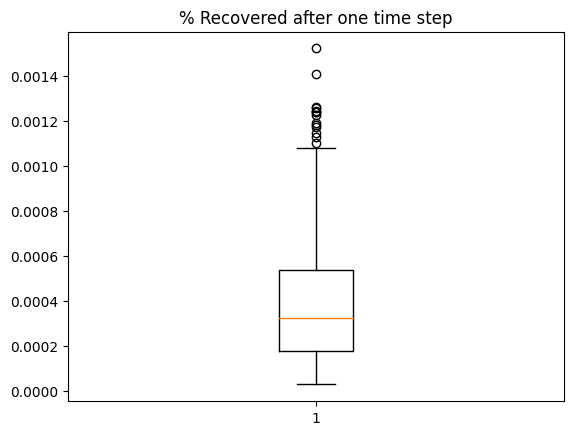

In [67]:
test = []
for X,y in ds:
    test.append(y[:,2])
t = torch.concat(test)
plt.boxplot(t)
plt.title("% Recovered after one time step");

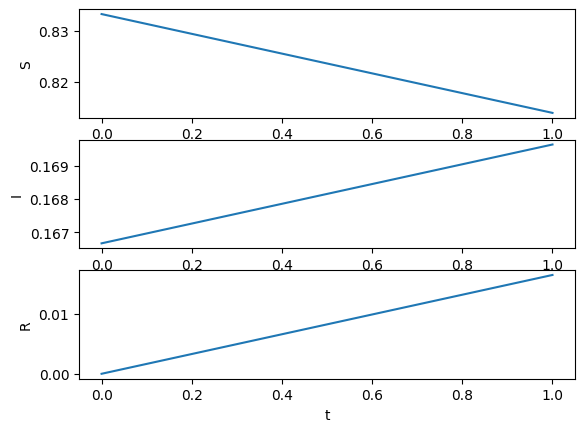

In [43]:
beta_dist = Uniform(0.1, 0.25)
gamma_dist = Uniform(0.05, 0.1)
ds = Epidemiology(beta_dist, gamma_dist, 2, 1, 1, "test")
fig, ax = plt.subplots(3,1)
for X,y in ds:
    X = torch.concat((X[:1],y), dim=0)
    ax[0].plot(X[:,0])
    ax[1].plot(X[:,1])
    ax[2].plot(X[:,2])
ax[0].set_ylabel("S")
ax[1].set_ylabel("I")
ax[2].set_ylabel("R")
ax[2].set_xlabel("t");